In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd

# data는 신한카드, 공공데이터포털에서 계산한 매달 결제 건수, 코로나 관련 누적 데이터 수
data = pd.read_csv("/content/drive/MyDrive/covid_shinhan_data.csv")

# 불필요한 column drop
data.drop(['Unnamed: 8'], axis = 1, inplace = True)
data.drop(['Unnamed: 9'], axis = 1, inplace = True)
data.drop(['Unnamed: 10'], axis = 1, inplace = True)
data.drop(['Unnamed: 11'], axis = 1, inplace = True)
data.drop(['Unnamed: 12'], axis = 1, inplace = True)
data

,ta_ym,accexamcnt,clearcnt,deathcnt,decidecnt,examcnt,resutlnegcnt,sport
0,201701,0.0,0,0,0,0,0.0,134665
1,201702,0.0,0,0,0,0,0.0,130786
2,201703,0.0,0,0,0,0,0.0,144921
3,201704,0.0,0,0,0,0,0.0,155813
4,201705,0.0,0,0,0,0,0.0,166316
5,201706,0.0,0,0,0,0,0.0,159745
6,201707,0.0,0,0,0,0,0.0,162406
7,201708,0.0,0,0,0,0,0.0,163037
8,201709,0.0,0,0,0,0,0.0,154452
9,201710,0.0,0,0,0,0,0.0,165512


In [8]:
# data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ta_ym         53 non-null     int64  
 1   accexamcnt    51 non-null     float64
 2   clearcnt      53 non-null     int64  
 3   deathcnt      53 non-null     int64  
 4   decidecnt     53 non-null     int64  
 5   examcnt       53 non-null     int64  
 6   resutlnegcnt  51 non-null     float64
 7   sport         53 non-null     int64  
dtypes: float64(2), int64(6)
memory usage: 3.4 KB


In [9]:
# 결측값 확인하고 0으로 채우기
print(data.isna().sum())
data = data.fillna(0)
print(data.isna().sum())

ta_ym           0
accexamcnt      2
clearcnt        0
deathcnt        0
decidecnt       0
examcnt         0
resutlnegcnt    2
sport           0
dtype: int64
ta_ym           0
accexamcnt      0
clearcnt        0
deathcnt        0
decidecnt       0
examcnt         0
resutlnegcnt    0
sport           0
dtype: int64


In [11]:
# column들의 상관관계 분석
data.corr()

,ta_ym,accexamcnt,clearcnt,deathcnt,decidecnt,examcnt,resutlnegcnt,sport
ta_ym,1.000000,0.723018,0.645494,0.554654,0.601112,0.673278,0.724516,-0.380850
accexamcnt,0.723018,1.000000,0.893816,0.865219,0.907160,0.974608,0.997912,-0.542033
clearcnt,0.645494,0.893816,1.000000,0.795163,0.822681,0.906711,0.887933,-0.497061
deathcnt,0.554654,0.865219,0.795163,1.000000,0.832669,0.916629,0.860979,-0.700804
decidecnt,0.601112,0.907160,0.822681,0.832669,1.000000,0.908103,0.883197,-0.560307
examcnt,0.673278,0.974608,0.906711,0.916629,0.908103,1.000000,0.970001,-0.561736
resutlnegcnt,0.724516,0.997912,0.887933,0.860979,0.883197,0.970001,1.000000,-0.542944
sport,-0.380850,-0.542033,-0.497061,-0.700804,-0.560307,-0.561736,-0.542944,1.000000


In [12]:
# 중점으로 다룰 스포츠 결제 건수와 확진자 수의 관계
r_value = data["sport"].corr(data["decidecnt"])
r_value

-0.5603073225141807

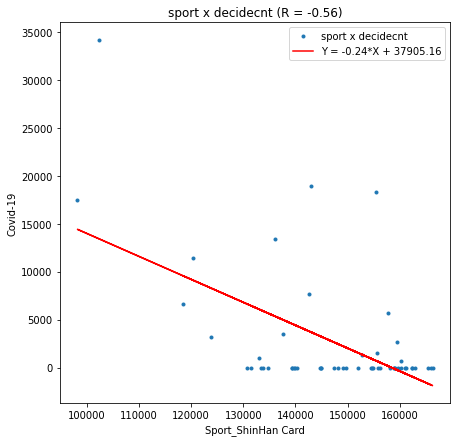

In [14]:
# 스포츠 결제 건수와 코로나 확진자 수 상관관계 시각화
from scipy import stats
import matplotlib.pyplot as plt
regr = stats.linregress(data["sport"], data["decidecnt"])
regr_line = f'Y = {regr.slope:.2f}*X + {regr.intercept:.2f}'
plt.figure(figsize = (7,7))
plt.plot(data["sport"], data["decidecnt"],".")
plt.plot(data["sport"], regr.slope * data["sport"] + regr.intercept, 'r')
plt.legend(['sport x decidecnt', regr_line])
plt.title(f'sport x decidecnt (R = {regr.rvalue:.2f})')
plt.xlabel('Sport_ShinHan Card')
plt.ylabel('Covid-19')
plt.show()

In [19]:
# 데이터 전처리 - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

MinMax_scaler = MinMaxScaler()
scale_cols = ["ta_ym","accexamcnt", "clearcnt", "deathcnt", "decidecnt","examcnt", "resutlnegcnt", "sport"]
df_scaled = MinMax_scaler.fit_transform(data[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

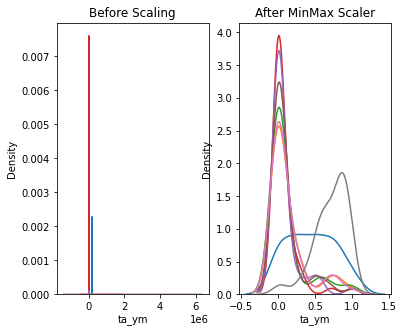

In [23]:
# MinMaxScaling 결과 시각화
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(data['ta_ym'], ax=ax1)
sns.kdeplot(data['accexamcnt'], ax=ax1)
sns.kdeplot(data['clearcnt'], ax=ax1)
sns.kdeplot(data['deathcnt'], ax=ax1)
sns.kdeplot(data['decidecnt'], ax=ax1)
sns.kdeplot(data['examcnt'], ax=ax1)
sns.kdeplot(data['resutlnegcnt'], ax=ax1)
sns.kdeplot(data['sport'], ax=ax1)

ax2.set_title('After MinMax Scaler')
sns.kdeplot(df_scaled['ta_ym'], ax=ax2)
sns.kdeplot(df_scaled['accexamcnt'], ax=ax2)
sns.kdeplot(df_scaled['clearcnt'], ax=ax2)
sns.kdeplot(df_scaled['deathcnt'], ax=ax2)
sns.kdeplot(df_scaled['decidecnt'], ax=ax2)
sns.kdeplot(df_scaled['examcnt'], ax=ax2)
sns.kdeplot(df_scaled['resutlnegcnt'], ax=ax2)
sns.kdeplot(df_scaled['sport'], ax=ax2)
plt.show()

In [57]:
# trian, test에 편향되지 않게 split하기 위해 data split
df_shuffled=df_scaled.sample(frac=1).reset_index(drop=True)
df_shuffled

,ta_ym,accexamcnt,clearcnt,deathcnt,decidecnt,examcnt,resutlnegcnt,sport
0,0.264851,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.890583
1,0.502475,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.747630
2,0.007426,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.845848
3,0.757426,0.203253,0.064277,0.036538,0.044036,1.362228e-01,0.203462,0.844879
4,0.257426,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.942364
5,0.262376,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.910676
6,0.022277,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.988200
7,0.512376,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.996067
8,0.517327,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.850882
9,0.750000,0.146689,0.142573,0.163462,0.028627,8.466211e-02,0.151438,0.512035


In [58]:
# data split
train = df_shuffled[:-10]
train = train.sort_values(by=['ta_ym'], axis=0)
test = df_shuffled[-10:]
test = test.sort_values(by=['ta_ym'], axis=0)

In [59]:
# train, validation, test dataset 생성
import numpy as np
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ["ta_ym","accexamcnt", "clearcnt", "deathcnt", "decidecnt","examcnt", "resutlnegcnt"]
label_cols = ["sport"]

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 1)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
print(x_train.shape, x_valid.shape)

# test dataset
test_feature = test[feature_cols]
test_label = test[label_cols]
test_feature, test_label = make_dataset(test_feature, test_label, 1)
print(test_feature.shape, test_label.shape)

(33, 1, 7) (9, 1, 7)
(9, 1, 7) (9, 1)


In [60]:
# import 라이브러리 
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [61]:
# node 수 = 16, activation = relu, dense 1인 LSTM 모델 생성
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [62]:
# data 학습
import os

# loss = mse, optimzer = adam으로 model compile
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# epoch = 200, batch_size = 16
history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
3/3 [==============================] - 3s 423ms/step - loss: 0.5584 - val_loss: 0.6369

Epoch 00001: val_loss improved from inf to 0.63690, saving model to model/tmp_checkpoint.h5
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5536 - val_loss: 0.6275

Epoch 00002: val_loss improved from 0.63690 to 0.62753, saving model to model/tmp_checkpoint.h5
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5409 - val_loss: 0.6184

Epoch 00003: val_loss improved from 0.62753 to 0.61841, saving model to model/tmp_checkpoint.h5
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5267 - val_loss: 0.6093

Epoch 00004: val_loss improved from 0.61841 to 0.60933, saving model to model/tmp_checkpoint.h5
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5156 - val_loss: 0.6001

Epoch 00005: val_loss improved from 0.60933 to 0.60009, saving model to model/tmp_checkpoint.h5
Epoch 6/200
3/3 [===========

In [63]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)
test_feature

array([[[1.73267327e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.69801980e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[2.72277228e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[5.00000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[5.07425743e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[7.42574257e-01, 0.00000000e+00, 3.90502968e-05, 0.00000000e+00,
         0.00000000e+00, 2.03155740e-07, 0.00000000e+00]],

       [[7.59900990e-01, 2.62023230e-01, 6.99000312e-02, 4.42307692e-02,
         1.64946343e-01, 1.94535232e-01, 2.29822068e-01]],

       [[9.90099010e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+

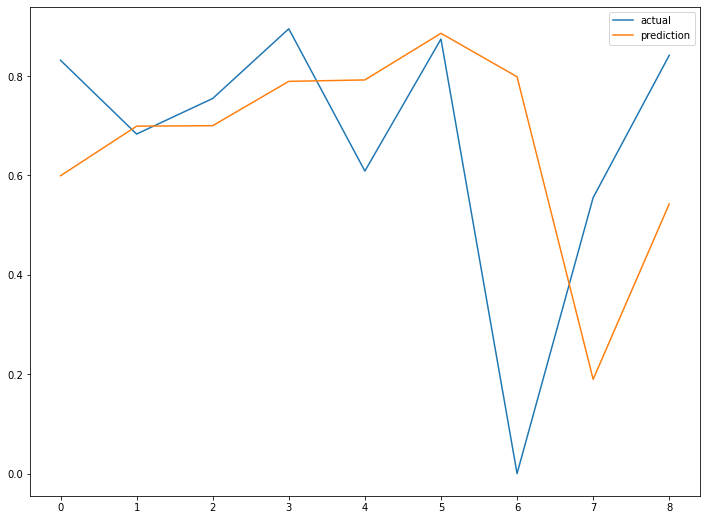

In [64]:
# 실제, 예측 데이터 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [65]:
# 코로나 상황이 점차 좋아진다고 가정한 test 데이터 셋 구축
test = [[[202111, 10000, 500, 10, 100, 8000, 500]],[[202201, 5000, 300, 9, 75, 4000, 300]],
        [[202203, 3500, 100, 8, 50, 250, 100]],[[202205, 3500, 100, 8, 50, 250, 100]],
        [[202207, 3700, 75, 6, 40, 2600, 200]],[[202209, 3000, 60, 5, 43, 2000, 80]],
        [[202211, 1500, 53, 4, 35, 1000, 40]],[[202301, 750, 55, 3, 20, 700, 35]],
        [[202303, 600, 50, 2, 15, 500, 30]],[[202305, 500, 30, 1, 17, 400, 25]],
        [[202307, 250, 15, 0, 10, 150, 15]],[[202309, 100, 7, 0, 3, 50, 10]],[[202311, 50, 0, 0, 0, 3, 3]]]

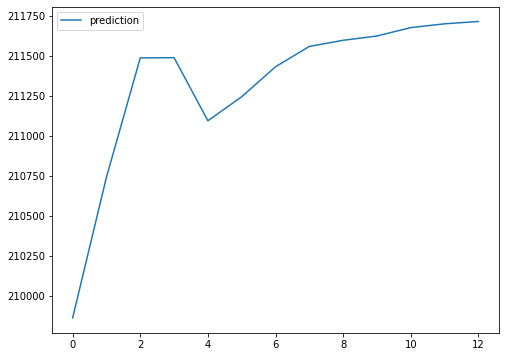

In [66]:
# LSTM 모델로 test set 예측
test_pred = model.predict(test)

for i in range(len(test_pred)):
  test_pred[i] = 50000 + test_pred[i]

# test set 기반, 예측한 상황 시각화
plt.figure(figsize=(8, 6))
plt.plot(test_pred, label='prediction')
plt.legend()
plt.show()